<a href="https://colab.research.google.com/github/Untick/Selector_ObjDet/blob/main/Trokhachev%20Anton/%D0%A2%D1%80%D0%BE%D1%85%D0%B0%D1%87%D0%B5_%D0%90%D0%BD%D1%82%D0%BE%D0%BD_Selector%20FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача проекта: реализовать возможность поиска похожих видов одежды.

In [ ]:
# Работа с массивами данных
import numpy as np

# Работа с таблицами
import pandas as pd

# Основные слои
from tensorflow.keras.layers import Add, Dense, Dropout, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Lambda, LeakyReLU

# Оптимизаторы для обучения модели
from tensorflow.keras.optimizers import Adam, Nadam, Adamax, Adadelta, Adagrad, RMSprop
from tensorflow.keras.optimizers import SGD

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Загрузка сохраненной модели
from tensorflow.keras.models import load_model

# класс для использования Functional API
from tensorflow.keras import Model

# Отрисовка изображения
from tensorflow.keras.preprocessing import image

# Импортируем Keras
from tensorflow import keras

# Импортируем Keras
import keras

# Подключим модуль вычислений на Keras
import keras.backend as K

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

# Функция среднеквадратической ошибки для расчетов вручную
from sklearn.metrics import mean_squared_error

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Сохранение списков в файлы
import pickle

# Работа с файловой системой
from pathlib import Path

# Отчистка неиспользуемой памяти
import gc

# Работа со случайными числами
from random import randint

# Работа с регулярными выражениями
import re

#NearestNeighbors из sklearn
from sklearn.neighbors import NearestNeighbors

# Визуальная строка прогресса
!pip install tqdm
from tqdm.notebook import tqdm

# Отрисовка графиков
import matplotlib.pyplot as plt
%matplotlib inline

# Установка и обновление библиотеки pillow для работы с изображениями
import PIL
from PIL import Image
a = PIL.__version__
if a != '9.4.0':
    !pip install --upgrade pillow==9.4.0
    print('Перезапустите сеанс, чтобы нужная версия pillow вступила в силу!!!')

Внимание! Если появилось сообщение 'Перезапустите сеанс, чтобы нужная версия pillow вступила в силу!!!' нажмите на кнопку перезапуска среды. И запустите проект еще раз.

Далее скачиваем датасет из облака и разархивируем его. Для скачивания используем gdown.download с параметром fuzzy=True, который дает возможность скачивать файлы с гугл диска по ссылке.

Для разархивации воспользуемся командой !unzip с параметром -qq, которая запускает разархивацию в тихом режиме, без вывода огромного списка разархивируемых файлов.

In [ ]:
gdown.download('https://drive.google.com/file/d/1d6HTFA9aN_G3ROykmeq8_5E11kuAiyFv/view?usp=sharing', None, quiet=True, fuzzy=True)
!unzip -qq -o dataset_new.zip -d dataset_new4/
print('Готово')

Готово


В нашем датасете содержатся файлы изображений в нескольких форматах (.jpg .webp .png). Необходимо все перевести в один формат. Сохранять будем в .jpg

In [ ]:
path = 'dataset_new4' #>>>прописать путь до каталога с каталогами одежды
path_to = 'dataset_new5'  #Новый каталог

pattern = '.*(?=\.)'           #Паттерн для регулярного выражения
dir_list = os.listdir(path)    #Сохраним в список все имеющиеся каталоги в нашем датасете
if not os.path.isdir(path_to): #Проверям на отсутствие каталога path_to
     os.mkdir(path_to)         #Создаем каталог path_to
for i in dir_list:             #Запускаем цикл для каждого каталога в нашем датасете
    if not os.path.isdir(f'{path_to}/{i}'):   #Проверям на отсутствие каталога в новом каталоге
        os.mkdir(f'{path_to}/{i}')            #Создаем каталог для сохранения обработанных изображений
    fl = os.listdir(f'{path}/{i}')            #Сохраняем список файлов в каталоге с изображениями
    for i2 in fl:                             #Запускаем цикл для каждого изображения в каталоге   #>>>Если нужна неполная версия датасета, заменяем на fl[:50] для 50 файлов в каждом каталоге
        fn = re.match(pattern, i2)            #При помощи регулярного выражения забираем только имя файла без его разрешения
        img = f'{path}/{i}/{i2}'              #Сохраняем путь к изображению в переменную
        try:                                  #Используем TRY, чтобы при возникновении ошибки не прерывался процесс
            im = Image.open(img).convert("RGB")   #Читаем и конвертируем изображение при помощи библиотеки PIL
        except:                               #Используем EXCEPT, чтобы при возникновении ошибки не прерывался процесс
            print(f'При обработке файла {i}/{i2} произошла ошибка. Файл не читается.')   #Выводим сообщение с каким файлом произошла ошибка
            pass                              #Выполняем код дальше
        if not os.path.isfile(f'{path_to}/{i}/{fn.group(0)}.jpg'):  #Проверям на отсутствие файла с таким же именем
            im.save(f'{path_to}/{i}/{fn.group(0)}.jpg', 'jpeg')     #Сохраняем изображение в .jpg
        else:                                                       #Если вайл с таким именем уже существует
            im.save(f'{path_to}/{i}/{fn.group(0)}ren545.jpg', 'jpeg')   #Добавляем в конце имени ren545 и сохраняем в .jpg
        im.close()                                                  #Закрываем изображение и выгружаем его из памяти
        os.remove(f'{path}/{i}/{i2}')         #Удаляем исходное изображение

print('Готово')

Готово


Так как датасет полностью не помещается в оперативной памяти, было принято решение разделить его на части, с возможностью последующей загрузки.

Для обучения НС нам понадобится:
- Массив с изображениями.
- Массив с метками классов в формате OHE.
- Массив с метками цветов на изображении.

Для отслеживания отсутствия переобучения нам необходимо подготовить данные с тестовой выборкой.

Для работы с изображениями была выбрана библиотека pillow. Но у нее есть особенность, в версиях ниже 9.4.0 функция квантизации изображения не работает. Поэтому обновляем версию перед началом работы, иначе после обновления необходимо будет перезапустить среду и часть проделанной работы может быть утеряна.

Для квантизации (уменьшения колличества цветов в изображении) была создана своя палитра. Это решение хорошо тем, что если у клиента на сайте уже есть готовая палитра цветов для поиска изображений, то можно быстро адаптировать проект.

Палитра создана в виде словаря для того чтобы на его основе можно было реализовать счетчик цветов.
Далее каждое значение цвета из словаря делится на общее колличество пикселей на изображении и мы получаем процентное соотношение этого цвета на изображении. Данные о цвете хранятся в виде от 0 до 1, т.к. эти значения лучше всего подходят для обучения НС.


In [ ]:
#Палитра цветов в виде словаря которая будет использоваться для уменьшения колличества цветов изображения
color_map =   {(255, 255, 255) : 0,  #белый
               (0, 0, 0) : 0,        #черный
               (195, 195, 195) : 0,  #серый
               (88, 88, 88) : 0,     #темно-серый
               (136, 0, 27) : 0,     #бордовый
               (236, 28, 36) : 0,    #красный
               (255, 127, 39) : 0,   #оранжевый
               (255, 202, 24) : 0,   #золотистый
               (253, 236, 166) : 0,  #бежевый
               (255, 242, 0) : 0,    #желтый
               (255, 228, 116) : 0,  #циплячий
               (169, 255, 14) : 0,   #салатовый
               (14, 209, 69) : 0,    #изумрудный
               (59, 151, 84) : 0,    #травянистый
               (92, 99, 65) : 0,     #хаки
               (140, 255, 251) : 0,  #небесно-голубой
               (158, 187, 201) : 0,  #серо-голубой
               (0, 168, 243) : 0,    #бирюзовый
               (63, 72, 204) : 0,    #синий
               (54, 56, 107) : 0,    #темно-синий
               (184, 61, 186) : 0,   #фуксия
               (255, 174, 200) : 0,  #розовый
               (185, 122, 86) : 0,}  #коричневый

palettedata = []  #Пустой список для палитры

for color in color_map:   #Цикл для каждой строки словаря
    palettedata.append(color[0])   #Берем значение R
    palettedata.append(color[1])   #Берем значение G
    palettedata.append(color[2])   #Берем значение B

palimage = Image.new('P', (1, 1))  #Создаем изображение
palimage.putpalette(palettedata)   #Присваиваем данному изображению эту палитру


#Параметры
IMG_WIDTH = 224   #Задаем ширину изображений
IMG_HEIGHT = 224  #Задаем высоту изображений
CHANELS = 3       #Колличество каналов изображения

#Обучающая выборка
FILE_DIR  = 'dataset_new5'                #Основной каталог в котором у нас лежит датасет
dir_list = os.listdir(FILE_DIR)           #Читаем список каталогов в основном каталоге
CLASS_LIST = sorted(os.listdir(FILE_DIR)) #Создаем список в котором будут лежать названия всех классов, берем название из имени каталога
CLASS_COUNT = len(CLASS_LIST)             #Узнаем колличество классов, проверяем длинну списка с именами классов


patch_list = []                           #Пустой список куда будем добавлять путь для изображений
id_list = []                              #Пустой список куда будем добавлять порядковый номер изображения

#Параметры создания обучающего датасета
raz = 0     #Переменная для начального отсчета на сколько частей разбивать датасет
maxraz = 7  #Сколько частей датасета будет
start = 0   #С какого файла по счету начинать создавать эту часть датасета
end = 100   #Каким файлом по счету заканчивать эту часть датасета
sdvig = 100 #На сколько сдвигаемся для следующей части датасета

while raz < maxraz:       #Цикл для создания частей датасета
    image_array = []      #Пустой список куда будем добавлять изображения
    data_labels = []      #Пустой список куда будем добавлять метку класса изображения
    color_list = []       #Пустой список куда будем добавлять метку цвета для изображения
    class_label = 0       #Переменная для хранения номера класса
    for i in dir_list:    #Цикл для каждого каталога в нашем датасете
        file_list = os.listdir(f'{FILE_DIR}/{i}')   #Получаем список файлов в каталоге
        ch = 0                                      #Выставляем счетчик на 0
        dl = len(file_list)                         #Узнаем сколько всего файлов в каталоге
        for image in file_list[start:end]:          #Цикл для каждого изображения в этом каталоге в диапазоне от и до по номерам файлов
            try:                                    #Используем TRY для того чтобы цикл не прерывался если возникнет ошибка обработки изображения
                img = Image.open(f'{FILE_DIR}/{i}/{image}').resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")   #Открываем изображение, изменяем его размер и формат
                patch_list.append(f'{FILE_DIR}/{i}/{image}')       #Сохраняем в список путь к изображению
                id_list.append(i)                                  #Сохраняем в список порядковый номер изображения
                img_np = np.array(img)                             #Переводим изображение в матррицу
                img = img.quantize(colors=32, method=2, kmeans=0, palette=palimage, dither=Image.NONE,).convert("RGB") #Уменьшаем колличество цветов на изображении применив нашу палитру
                pixel_values = list(img.getdata())       #Получаем данные о цвете каждого пикселя
                pixel_values = np.array(pixel_values).reshape((IMG_WIDTH * IMG_HEIGHT, CHANELS))  #Преобразуем в матрицу
                for key, value in color_map.items():    #Цикл для каждого цвета в словаре
                    color_map[key] = 0                  #Устанавливаем для каждого цвета в словаре счетчик на 0
                for color in pixel_values:              #Цикл для каждого пикселя в изображении
                    color_map[color[0], color[1], color[2]] += 1   #Прибавляем +1 в значение словаря к тому цвету, какой сейчас пиксель мы читаем
                for key, value in color_map.items():               #Цикл для каждого цвета в словаре
                    color_list.append(round(value / (IMG_WIDTH * IMG_HEIGHT), 2))    #Считаем процентное соотношение этого цвета на изображении
                img.close()                             #Закрываем изображение и выгружаем его из памяти
                image_array.append(img_np)              #Матрицу изображения добавляем в список
                ch += 1                                 #Увеличиваем счетчик номера класа на 1
            except:                                     #except - инструкция на случай ошибки в TRY
                print(f'При обработке файла {i}/{image} произошла ошибка')   #Выводим информацию с каким файлом произошла ошибка
                pass                                                         #Продолжаем выполнять цикл
        data_labels += [class_label] * ch   #Добавляем для обработанного каталога метки класса
        class_label += 1                    #Увеличиваем счетчик метки класса

    image_array = np.array(image_array)     #Переводим все изображения в массив
    image_array = image_array.reshape(-1,IMG_HEIGHT,IMG_WIDTH,CHANELS)   #Решейпим
    image_array = image_array.astype('float32')   #указываем формат данных
    image_array /= 255                            #Делим на 255, чтобы значения массива были < 1
    x_data = image_array                          #Сохраняем в x_data
    y_data = np.array(data_labels)                #Переводим все метки классов в массив
    z_data = np.array(color_list)                 #Переводим все метки цветов в массив
    z_data = z_data.reshape((CLASS_COUNT * sdvig), len(color_map))    #Решейпим
    x_train = x_data                              #Сохраняем в x_train
    y_train = y_data.astype('float32')            #указываем формат данных для меток классов
    z_train = z_data.astype('float32')            #указываем формат данных для меток цветов
    y_train_cat = keras.utils.to_categorical(y_train, CLASS_COUNT)       #Сохраняем метки классов в формат OHE
    np.save(f'x_train{raz}.npy', x_train)         #Сохраняем массив изображений в файл
    np.save(f'y_train_cat{raz}.npy', y_train_cat) #Сохраняем метки классов в файл
    np.save(f'z_train{raz}.npy', z_train)         #Сохраняем метки цветов в файл
    print(f'Файлы x_train{raz}.npy и y_train_cat{raz}.npy и z_train{raz}.npy {start} -> {end} созданы.')   #Выводим сообщение о завершении создания части датасета
    raz += 1         #Увеличиваем счетчик колличества частей датасета
    start += sdvig   #Увеличиваем начало отсчета файлов в каталоге
    end += sdvig     #Увеличиваем конец отсчета файлов в каталоге

with open('patch_list.data', 'wb') as file:    #Сохраняем список с путями к изображению
    pickle.dump(patch_list, file)
with open('id_list.data', 'wb') as file2:      #Сохраняем список с порядковым номером изображения
    pickle.dump(id_list, file2)

#Очищаем ненужные переменные чтобы освободить память
del image_array
del data_labels
del color_list
del pixel_values
del x_data
del y_data
del z_data

#Повторяем все те же действия для создания тестовой выборки
#Тестовая выборка

image_array = []
data_labels = []
class_label = 0
test_patch_list = []
test_id_list = []

dir_list = os.listdir(FILE_DIR)

raz = 0
maxraz = 1
start = 700
end = 780
sdvig = 80

while raz < maxraz:
    image_array = []
    data_labels = []
    color_list = []
    class_label = 0
    for i in dir_list:
        file_list = os.listdir(f'{FILE_DIR}/{i}')
        ch = 0
        dl = len(file_list)
        for image in file_list[start:end]:
            try:
                img = Image.open(f'{FILE_DIR}/{i}/{image}').resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")
                test_patch_list.append(f'{FILE_DIR}/{i}/{image}')
                test_id_list.append(i)
                img_np = np.array(img)
                img = img.quantize(colors=32, method=2, kmeans=0, palette=palimage, dither=Image.NONE,).convert("RGB")
                pixel_values = list(img.getdata())
                pixel_values = np.array(pixel_values).reshape((IMG_WIDTH * IMG_HEIGHT, CHANELS))
                for key, value in color_map.items():
                    color_map[key] = 0
                for color in pixel_values:
                    color_map[color[0], color[1], color[2]] += 1
                for key, value in color_map.items():
                    color_list.append(round(value / (IMG_WIDTH * IMG_HEIGHT), 2))
                img.close()
                image_array.append(img_np)
                ch += 1
            except:
                print(f'При обработке файла {i}/{image} произошла ошибка')
                pass
        data_labels += [class_label] * ch
        class_label += 1
    image_array = np.array(image_array)
    image_array = image_array.reshape(-1,IMG_HEIGHT,IMG_WIDTH,CHANELS)
    image_array = image_array.astype('float32')
    image_array /= 255
    x_data = image_array
    y_data = np.array(data_labels)
    z_data = np.array(color_list)
    z_data = z_data.reshape((CLASS_COUNT * sdvig), len(color_map))
    x_test = x_data
    y_test = y_data.astype('float32')
    z_test = z_data.astype('float32')
    y_test_cat = keras.utils.to_categorical(y_test, CLASS_COUNT)
    np.save(f'x_test{raz}.npy', x_test)
    np.save(f'y_test_cat{raz}.npy', y_test_cat)
    np.save(f'z_test{raz}.npy', z_test)
    print(f'Файлы x_test{raz}.npy и y_test_cat{raz}.npy и z_test{raz}.npy {start} -> {end} созданы.')
    raz += 1
    start += sdvig
    end += sdvig

with open('test_patch_list.data', 'wb') as file:
    pickle.dump(test_patch_list, file)
with open('test_id_list.data', 'wb') as file2:
    pickle.dump(test_id_list, file2)

del image_array
del data_labels
del color_list
del pixel_values
del x_data
del y_data
del z_data
print('Готово')

Файлы x_train0.npy и y_train_cat0.npy и z_train0.npy 0 -> 100 созданы.
Файлы x_train1.npy и y_train_cat1.npy и z_train1.npy 100 -> 200 созданы.
Файлы x_train2.npy и y_train_cat2.npy и z_train2.npy 200 -> 300 созданы.
Файлы x_train3.npy и y_train_cat3.npy и z_train3.npy 300 -> 400 созданы.
Файлы x_train4.npy и y_train_cat4.npy и z_train4.npy 400 -> 500 созданы.
Файлы x_train5.npy и y_train_cat5.npy и z_train5.npy 500 -> 600 созданы.
Файлы x_train6.npy и y_train_cat6.npy и z_train6.npy 600 -> 700 созданы.
Файлы x_test0.npy и y_test_cat0.npy и z_test0.npy 700 -> 780 созданы.
Готово


После завершения этого этапа мы разбили датасет на части и сохранили каждую часть в отдельный файл.

В блоке ниже показан пример того как производится загрузка файлов в переменные

In [ ]:
#Загрузка одной части датасета в переменную
x_train = np.load('x_train0.npy')           #Обучающая выборка - массив изображений
y_train_cat = np.load('y_train_cat0.npy')   #Обучающая выборка - массив меток классов в формате OHE
z_train = np.load('z_train0.npy')           #Обучающая выборка - массив меток цветов

x_test = np.load('x_test0.npy')             #Тестовая выборка - массив изображений
y_test_cat = np.load('y_test_cat0.npy')     #Тестовая выборка - массив меток классов в формате OHE
z_test = np.load('z_test0.npy')             #Тестовая выборка - массив меток цветов

with open('patch_list.data', 'rb') as file: #Загружаем файл с путями до изображений для обучающей выборки
    patch_list = pickle.load(file)

with open('id_list.data', 'rb') as file2:   #Загружаем файл с порядковым номером изображений для обучающей выборки
    id_list = pickle.load(file2)

with open('test_patch_list.data', 'rb') as file3:     #Загружаем файл с путями до изображений для тестовой выборки
    test_patch_list = pickle.load(file3)

with open('test_id_list.data', 'rb') as file4:        #Загружаем файл с порядковым номером изображений для обучающей выборки
    test_id_list = pickle.load(file4)
print('Готово')

За основу архитектуры нейросети взята модель VGG16.

Из этой архитектуры был собран энкодер и зеркальный ему декодер.
Далее производим обьединение моделей в автоенкодер.

Далее при проведении экспериментов была выявленна тенденция, что уменьшение модели ведет к более быстрому обучению и более качественному результату определения категории.

После был добавлен еще один выход из НС, который предсказывает метку класса на основе изображения.
Это снизило колличество ошибочно предсказанных изображений из других классов.

Но предсказанные подобные изображения еще очень сильно отличались по цветам.
И тогда был добавлен входной слой с метками цветов изображения.

После НС стала выдавать нужный результат.
Т.к. заказчик не поставил конкретных метрик, а основной результат оценивается визуально, то цель была достигнута.

In [ ]:
#---------------- ЭНКОДЕР ----------------
batch_size = 10                    #Размер батча
latent_dim = 1024                  #Размер латентного пространства
input_img = Input((224, 224, 3))   #Входной слой

x = Conv2D(4, (3, 3), padding='same', activation='relu')(input_img)
x = MaxPooling2D()(x)

x = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Dropout(0.2)(x)

fl = Flatten()(x) #Добавим Flatten
bn = BatchNormalization()(fl)
color = Input(shape=(23,)) # Добавим входной слой для меток цвета
x = concatenate([bn, color]) # конкатенируем метку класса изображение

# Кодированное полносвязным слоем представление (вектор латентного пространства)
encoded = Dense(latent_dim, activation='sigmoid', name="encoded")(x)

l = Dense(100, activation='relu')(fl)
l = Dropout(0.25)(l)
l = Dense(20, activation='relu')(l)

label_encoded = Dense(12, activation='sigmoid', name="lb")(l)

encoder = Model([input_img, color], [encoded, label_encoded], name='encoder')

#---------------- ДЕКОДЕР ----------------
input_dec = encoded  # Вход в декодер = выход из энкодера
color_dec = Input(shape=(23,)) # Добавим вход для метки цвета
d = concatenate([input_dec, color_dec]) # Конкатенируем метку цвета и вектор скрытого пространства
d = BatchNormalization()(d)
d = Dense(7*7*32, activation='relu')(d)
d = Reshape((7,7,32))(d)

d = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
d = Conv2D(32, (3, 3), padding='same', activation='relu')(d)
d = Conv2D(32, (3, 3), padding='same', activation='relu')(d)

d = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
d = Conv2D(32, (3, 3), padding='same', activation='relu')(d)
d = Conv2D(32, (3, 3), padding='same', activation='relu')(d)

d = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
d = Conv2D(16, (3, 3), padding='same', activation='relu')(d)
d = Conv2D(16, (3, 3), padding='same', activation='relu')(d)

d = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
d = Conv2D(8, (3, 3), padding='same', activation='relu')(d)

d = Conv2DTranspose(4, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
d = Conv2D(4, (3, 3), padding='same', activation='relu')(d)

decoded = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(d)

decoder = Model([input_dec, color_dec], decoded, name='decoder')

#---------------- АВТОЭНКОДЕР ----------------
autoencoder = Model([input_img, color, color_dec], [decoded, label_encoded], name="autoencoder")
print('Готово')

Готово


В процессе экспериментов было выявленно что оптимизатор Adam с функцией ошибки mse меньше подвержен переобучению с сохранением продолжительной возможностью обучаться дальше.

In [ ]:
# Компилируем
adam = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, amsgrad=True)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss=['mse', 'categorical_crossentropy'])
print('Готово')

Готово


В блоке ниже реализовон цикл позволяющий менять части датасета.

Но при такой работе очень быстро переполнялась оперативная память.
Поэтому была добавлена функция keras.backend.clear_session() которая отчищает память после каждой сессии обучения.

In [ ]:
virt_epochs = 10     # Число виртуальных эпох
start_epochs = 1     # Счетчик для эпох
while start_epochs < virt_epochs:                             # Цикл для каждой эпохи
    paths = sorted(Path('.').glob('x_train*.npy'))            # Считаем колличество файлов-частей датасета
    num_train = 0                                             # Счетчик номера файла для обучения
    for ijioj in paths:                                       # Цикл для каждого файла-части датасета
        x_train = np.load(f'x_train{num_train}.npy')          # Загружаем данные части датасета с массивом изображений в x_train
        y_train_cat = np.load(f'y_train_cat{num_train}.npy')  # Загружаем данные части датасета с метками класса в y_train_cat
        z_train = np.load(f'z_train{num_train}.npy')          # Загружаем данные части датасета с метками цветов в z_train
        # Обучим модель
        print(f'{start_epochs} эпоха обучения на файле x_train{num_train}.npy.')              # Выводим сообщение с номером эпохи и части датасета
        history = autoencoder.fit(x=[x_train, z_train, z_train], y=[x_train, y_train_cat],             # Подаем данные для обучения
                                    validation_data=([x_test, z_test, z_test], [x_test, y_test_cat]), # Подаем данные для теста
                                    epochs=1,                                                 # Число эпох
                                    batch_size=batch_size,                                    # Размер батча
                                    shuffle=True)                                             # Обучающую выборку перемешиваем
        del x_train                        # Выгружаем из памяти x_train
        gc.collect()                       # Выгружаем из памяти циклические ссылки
        keras.backend.clear_session()      # Выгружаем из памяти образовавшиеся данные сессии при обучении
        num_train += 1                     # Увеличивем счетчик файла-части датасета
    start_epochs += 1                      # Увеличивем счетчик эпохи обучения
print('Готово')

1 эпоха обучения на файле x_train0.npy.
120/120 [==============================] - 134s 1s/step - loss: 2.6527 - conv2d_16_loss: 0.1663 - lb_loss: 2.4864 - conv2d_16_accuracy: 0.7035 - lb_accuracy: 0.0750 - val_loss: 2.6232 - val_conv2d_16_loss: 0.1391 - val_lb_loss: 2.4842 - val_conv2d_16_accuracy: 0.7139 - val_lb_accuracy: 0.1187
1 эпоха обучения на файле x_train1.npy.
120/120 [==============================] - 108s 897ms/step - loss: 2.4584 - conv2d_16_loss: 0.1268 - lb_loss: 2.3316 - conv2d_16_accuracy: 0.7202 - lb_accuracy: 0.1967 - val_loss: 2.2066 - val_conv2d_16_loss: 0.1254 - val_lb_loss: 2.0812 - val_conv2d_16_accuracy: 0.7139 - val_lb_accuracy: 0.2885
1 эпоха обучения на файле x_train2.npy.
120/120 [==============================] - 127s 1s/step - loss: 2.1060 - conv2d_16_loss: 0.1206 - lb_loss: 1.9854 - conv2d_16_accuracy: 0.7213 - lb_accuracy: 0.3058 - val_loss: 1.8410 - val_conv2d_16_loss: 0.1253 - val_lb_loss: 1.7157 - val_conv2d_16_accuracy: 0.7139 - val_lb_accuracy: 0.

In [ ]:
encoder.save('encoder');     #Сохраняем модель энкодера, т.к. для поиска похожих изображений будем использовать только его
print('Готово')

Готово


На этом описание обучения нашей НС подошло к концу.

Выводы проекта:
1. Нужно попробовать собрать НС на трансформерах.
2. Хорошим вариантом реализации было бы запускать несколько НС для получения от них латентного пространства.
И это обьедененное латентное пространство от нескольких НС подавать на поиск похожих изображений.
Например модель ig_resnext101_32_32d из библиотеки TIMM выдает самый низкий процент ошибок про классификации.
Добавив еще VGG19 или свою НС, можно было бы получить хороший результат по классификации и правельный подбор изображений по цветам.
3. Еще один из вариантов это обрабатывать изображения в формате оттенков серого, и отдельно подавать метку цвета.
В этом случае можно было бы ускорить обучение и уменьшить колличество используемой оперативной памяти.


# Демонстрация работы

In [ ]:
gdown.download('https://drive.google.com/file/d/1tyBuINrAjfk7g4uACLogBRxXN-1eUC1r/view?usp=sharing', None, quiet=True, fuzzy=True)
!unzip -qq -o encoder.zip -d encoder/
encoder = keras.models.load_model('encoder');       #Загружаем модель энкодера
print('Готово')

Готово


In [ ]:
IMG_WIDTH = 224                      #Задаем ширину изображений
IMG_HEIGHT = 224                     #Задаем высоту изображений
CHANELS = 3                          #Колличество каналов изображения

color_map =   {(255, 255, 255) : 0,  #белый
               (0, 0, 0) : 0,        #черный
               (195, 195, 195) : 0,  #серый
               (88, 88, 88) : 0,     #темно-серый
               (136, 0, 27) : 0,     #бордовый
               (236, 28, 36) : 0,    #красный
               (255, 127, 39) : 0,   #оранжевый
               (255, 202, 24) : 0,   #золотистый
               (253, 236, 166) : 0,  #бежевый
               (255, 242, 0) : 0,    #желтый
               (255, 228, 116) : 0,  #циплячий
               (169, 255, 14) : 0,   #салатовый
               (14, 209, 69) : 0,    #изумрудный
               (59, 151, 84) : 0,    #травянистый
               (92, 99, 65) : 0,     #хаки
               (140, 255, 251) : 0,  #небесно-голубой
               (158, 187, 201) : 0,  #серо-голубой
               (0, 168, 243) : 0,    #бирюзовый
               (63, 72, 204) : 0,    #синий
               (54, 56, 107) : 0,    #темно-синий
               (184, 61, 186) : 0,   #фуксия
               (255, 174, 200) : 0,  #розовый
               (185, 122, 86) : 0,}  #коричневый

palettedata = []                     #Пустой список для палитры

for color in color_map:              #Цикл для каждой строки словаря
    palettedata.append(color[0])     #Берем значение R
    palettedata.append(color[1])     #Берем значение G
    palettedata.append(color[2])     #Берем значение B

palimage = Image.new('P', (1, 1))    #Создаем изображение, на которое будем ссылаться для наложения палитры на свои изображения
palimage.putpalette(palettedata)     #Присваиваем данному изображению ранее созданную палитру


dataset_patch = (input('Введите путь до папки с датасетом: ') or "dataset_new5")   #Запрашиваем путь к каталогу где лежат изображения которые будем добавлять в базу по поиску похожих изображений
dir_list = os.listdir(dataset_patch)                                         #Читаем список каталогов в каталоге с датасетом

file_list = []                                                               #Создаем переменную в которую будем складывать все найденные файлы

for i in dir_list:                                                           #Цикл для каждого каталога в датасете
    file_in_dir = os.listdir(f'{dataset_patch}/{i}')                         #Получаем список файлов в каталоге
    for i2 in file_in_dir:                                                   #Берем поочереди каждый найденный файл в каталоге
        file_list.append(f'{dataset_patch}/{i}/{i2}')                        #Добавляем полный путь изображения в file_list

x_train_big = []                                                             #Создаем переменную в которую будем добавлять код латентного пространства наших изображений

pbar = tqdm(total=len(file_list))                                            #Функция визуального отображения прогресса обработки изображений

for i in file_list:                                                          #Цикл в котором мы берем поочередно из списка полный путь до изображения
    try:                                                                     #Используем TRY чтобы при возникновении ошибки наш цикл не прекратил работу
        img = Image.open(i).resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")   #Открываем изображение, меняем его размер, конвертируем в RGB
        img_np = np.array(img)                                               #Переводим изображение в массив
        img_np = img_np.reshape(IMG_HEIGHT,IMG_WIDTH,CHANELS)                #Изменяем размер массива
        img_np = img_np.astype('float32')                                    #Присваиваем формат данных
        img_np /= 255                                                        #Делим на 255, чтобы получить числа в массиве не больше 1
        img = img.quantize(colors=32, method=2, kmeans=0, palette=palimage, dither=Image.NONE,).convert("RGB")   #Берем исходное изображение и квантизируем его в нашу палитру
        pixel_values = list(img.getdata())                                   #Получаем список цветов всех пикселей в формате RGB
        pixel_values = np.array(pixel_values).reshape((IMG_WIDTH * IMG_HEIGHT, CHANELS))   #переводим этот список в матрицу с тремя каналами
        for key, value in color_map.items():                                 #Цикл для обнуления данных нашего словаря с цветами
            color_map[key] = 0                                               #Присваиваем каждому значению счетчика 0
        for color in pixel_values:                                           #Цикл для каждого пикселя в нашем изображении
            color_map[color[0], color[1], color[2]] += 1                     #Получаем первое, второе, третье значение цвета пикселя и прибавляем этому значению счетчика в словаре 1
        color_list = []                                                      #Создаем пустой список в котором будем хранить процентное соотношение цвета на изображении
        for key, value in color_map.items():                                 #Цикл для каждого значения словаря
            color_list.append(round(value / (IMG_WIDTH * IMG_HEIGHT), 2))    #Добавляем в color_list значение счетчика деленное на число всех пикселей, округляем до 2-ух знаков после запитой
        color_list = np.array(color_list)                                    #Переводим color_list в массив
        img.close()                                                          #Закрываем изображение и выгружаем его из памяти
        code, _ = encoder.predict([img_np[None], color_list[None]], batch_size=1, verbose=0)    #Запускаем энкодер и подаем в него массив изображения и метку цвета
        x_train_big.append(code)                                             #Записываем полученное значение латентного пространства в x_train_big
        pbar.update(1)                                                       #Увеличиваем значение счетчика визуального отображения прогресса обработки
    except:                                                                  #Используем EXCEPT, что делать в случае ошибки в блоке TRY
        print(f'При обработке файла {i} произошла ошибка')                   #Выводим сообщение с названием файла в котором произошла ошибка
        file_list.remove(i)                                                  #Удаляем строку с этим файлом из нашего списка file_list
        pass                                                                 #Продолжаем выполнять цикл
pbar.close()                                                                 #Останавливаем счетчик визуального отображения прогресса обработки
gc.collect();                                                                #Отчищаем память от мусора

x_train_big = np.array(x_train_big)            #Переводим наш список с латентными пространствами всех изображений в массив
x_train_big = x_train_big.reshape(x_train_big.shape[0] * x_train_big.shape[1],1024)    #Меняем размер массива


assert len(x_train_big) == len(file_list)      #Проверяем длинну списка с латентными пространствами и длинну списка со всеми путями до изображений
nei_clf = NearestNeighbors(metric="euclidean") #Указываем настройку для NearestNeighbors
nei_clf.fit(x_train_big)                       #Запускаем обучение NearestNeighbors, в процессе которого будет создана система координат в которой похожие изображения будут находится рядом


def get_similar(image, color, n_neighbors=5):  #Функция получения номеров похожих изображений из базы
    code, _ = encoder.predict([image[None], color[None]], batch_size=1, verbose=0)   #Делаем encoder.predict и получаем латентное пространство изображения
    (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=n_neighbors)   #Берем нашу обученную базу nei_clf и применяем к ней функцию kneighbors, которая найдет ближайшие похожие латентные пространства
    return distances,idx

def show_similar(patch_img):                   #Функция отображения похожих изображений
    img = Image.open(patch_img).resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")   #Открываем наше изображение, изменяем его размер и конвертируем в RGB
    img_np = np.array(img)                                                       #Переводим изображение в массив
    img_np = img_np.reshape(IMG_HEIGHT,IMG_WIDTH,CHANELS)                        #Меняем размер массива для подачи в НС
    img_np = img_np.astype('float32')                                            #Присваиваем формат данных
    img_np /= 255                                                                #Делим на 255, чтобы получить числа в массиве не больше 1
    img = img.quantize(colors=32, method=2, kmeans=0, palette=palimage, dither=Image.NONE,).convert("RGB")    #Берем изображение и квантизируем его в нашу палитру
    pixel_values = list(img.getdata())                                           #Получаем список цветов всех пикселей в формате RGB
    pixel_values = np.array(pixel_values).reshape((IMG_WIDTH * IMG_HEIGHT, CHANELS))   #Переводим этот список в матрицу с тремя каналами
    for key, value in color_map.items():                                         #Цикл для обнуления данных нашего словаря с цветами
        color_map[key] = 0                                                       #Присваиваем каждому значению счетчика 0
    for color in pixel_values:                                                   #Цикл для каждого пикселя в нашем изображении
        color_map[color[0], color[1], color[2]] += 1                             #Получаем первое, второе, третье значение цвета пикселя и прибавляем этому значению счетчика в словаре 1
    color_list = []                                                              #Создаем пустой список в котором будем хранить процентное соотношение цвета на изображении
    for key, value in color_map.items():                                         #Цикл для каждого значения словаря
        color_list.append(round(value / (IMG_WIDTH * IMG_HEIGHT), 2))            #Добавляем в color_list значение счетчика деленное на число всех пикселей, округляем до 2-ух знаков после запитой
    color_list = np.array(color_list)                                            #Переводим color_list в массив
    img.close()                                                                  #Закрываем изображение и выгружаем его из памяти
    distances,neighbors = get_similar(img_np, color_list, n_neighbors=15)        #Запускаем функцию получения номеров похожих изображений из базы
    plt.rcParams['font.size'] = '12'                                             #Устанавливаем единый размер шрифта для PLT
    plt.figure(figsize=[10,5])                                                  #Устанавливаем размер поля для PLT
    plt.subplot(1,2,1)                                                           #Указываем место отображения первого изображения
    plt.axis("off")                                                              #Отключаем отображение координат
    img = Image.open(patch_img).resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")   #Открываем изображение, меняем его размер, конвертируем в RGB

    newimage = Image.open(patch_img).resize((224, 224)).convert("RGB").quantize(colors=32, method=2, kmeans=0, palette=palimage, dither=Image.NONE,).convert("RGB")   #Квантизируем в нашу палитру
    width, height = newimage.size              #Получем разрешение изображения
    pixel_values = list(newimage.getdata())    #Получаем список цветов всех пикселей в формате RGB
    pixel_values = np.array(pixel_values).reshape((width * height, 3))   #переводим этот список в матрицу с тремя каналами
    for key, value in color_map.items():       #Цикл для обнуления данных нашего словаря с цветами
        color_map[key] = 0                     #Присваиваем каждому значению счетчика 0
    for color in pixel_values:                 #Цикл для каждого пикселя в нашем изображении
        color_map[color[0], color[1], color[2]] += 1    #Получаем первое, второе, третье значение цвета пикселя и прибавляем этому значению счетчика в словаре 1
    color_list = []                            #Создаем пустой список в котором будем хранить процентное соотношение цвета на изображении
    for key, value in color_map.items():       #Цикл для каждого значения словаря
        color_list.append(value / (width * height) * 100)    #Добавляем в color_list значение счетчика деленное на число всех пикселей умножаем на 100, чтобы получились проценты
    colors = []                                #Пустой список, куда мы сложим цвета для нашей круговой диаграммы
    for key, value in color_map.items():       #Цикл для нашего словаря
        col = key[0] / 255, key[1] / 255, key[2] / 255    #Делим значение цвета на 255, т.к. PLT использует такой формат цветов
        colors.append(col)                     #Добавляем значения цвета в список

    img_np = np.array(img)                     #Переводим изображение в матрицу
    img_np = img_np.astype('float32')          #Присваиваем формат данных
    img_np /= 255                              #Делим на 255, чтобы получить числа в массиве не больше 1
    plt.imshow(img_np)                         #Отправляем на отрисовку изображение
    plt.title("Выбранное изображение")         #Заголовок

    plt.subplot(1,2,2)                         #Указываем место отображения круговой диаграммы
    plt.axis("off")                            #Отключаем отображение координат
    plt.pie(color_list, colors = colors, wedgeprops=dict(width=0.5, edgecolor='black'), startangle=90)   #Отправляем на отрисовку круговую диаграмму
    plt.title("Основные цвета изображения")    #Заголовок круговой диаграммы
    plt.show()                                 #Отрисовываем изображения

    plt.figure(figsize=[10,5])                  #Устанавливаем размер поля для PLT
    for i in range(15):                        #Цикл для каждого полученного предсказаного похожего изображения
        plt.subplot(3,5,i+1)                   #Указываем место отображения изображения
        plt.axis("off")                        #Отключаем отображение координат
        path_img = file_list[neighbors[i]]     #Узнаем путь до изображения по номеру
        img = Image.open(path_img).resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")   #Открываем изображение, меняем размер, конвертируем
        img_np = np.array(img)                 #Переводим в матрицу
        img_np = img_np.astype('float32')      #Присваиваем формат данных
        img_np /= 255                          #Делим на 255, чтобы получить числа в массиве не больше 1
        plt.imshow(img_np)                     #Отправляем на отрисовку изображение
        plt.title(round(distances[i], 2))      #Заголовок в котором указываем дистанцию - расстояние в nei_clf.kneighbors от поданного изображения
        img.close()                            #Закрываем изображение
    plt.show()                                 #Отрисовываем все изображения
print('Готово')

Введите путь до папки с датасетом: 


  0%|          | 0/13166 [00:00<?, ?it/s]

Готово


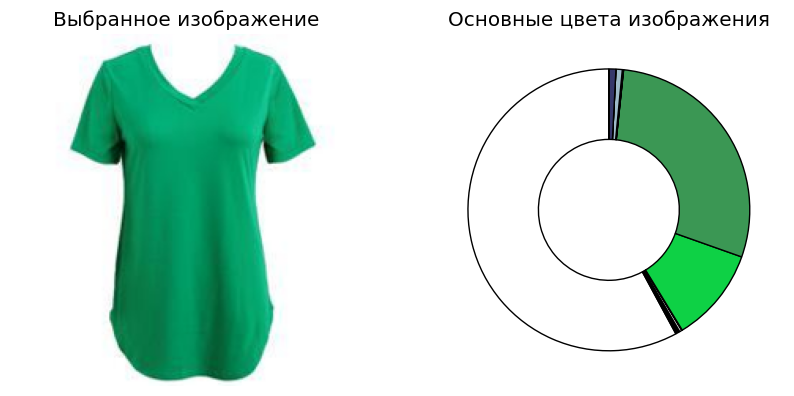

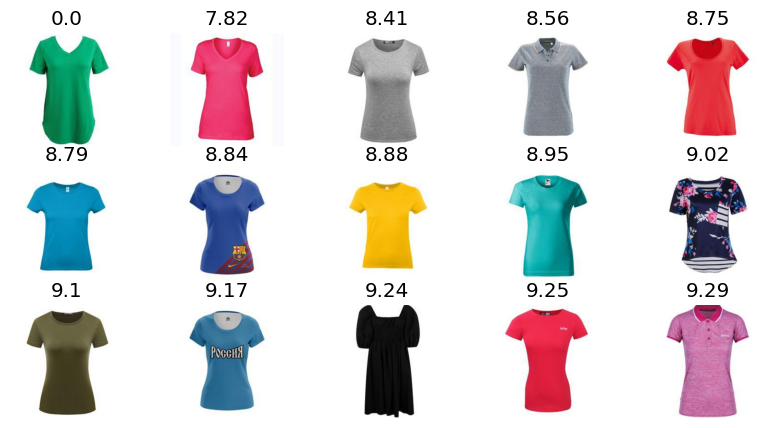

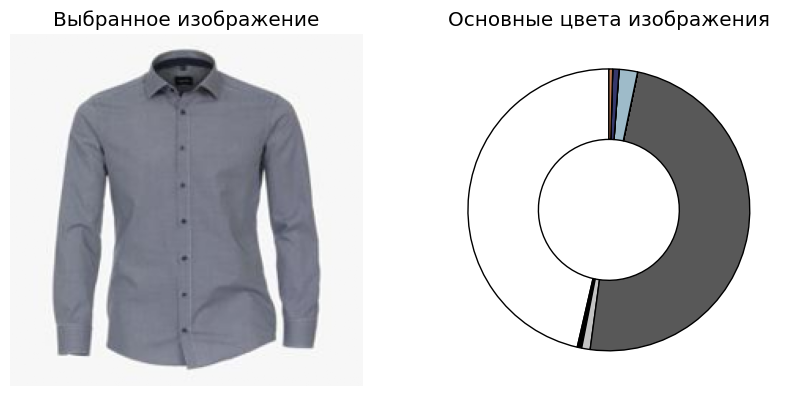

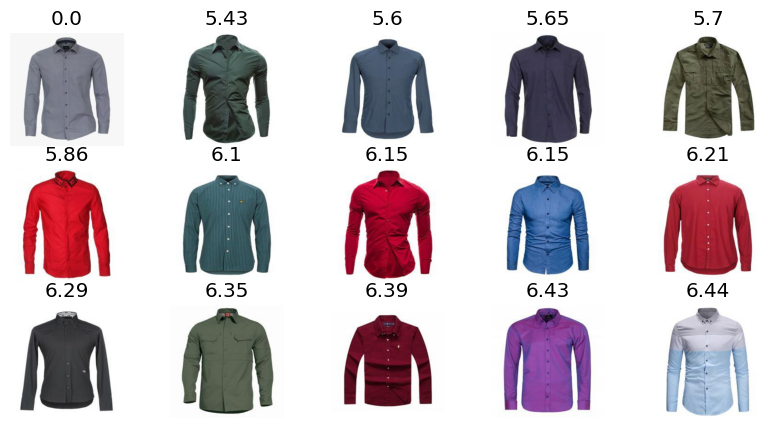

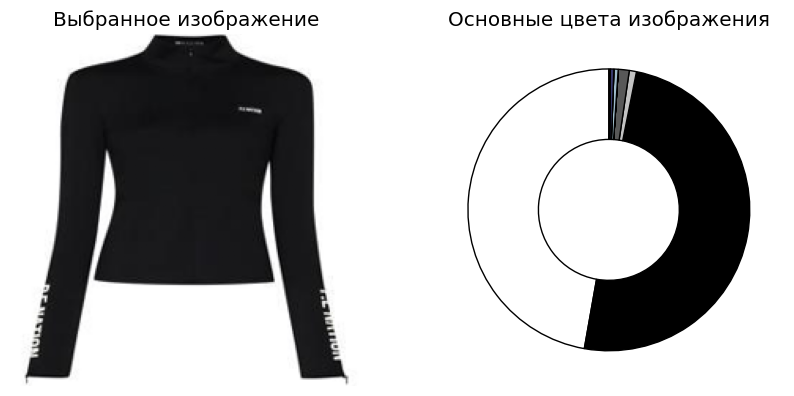

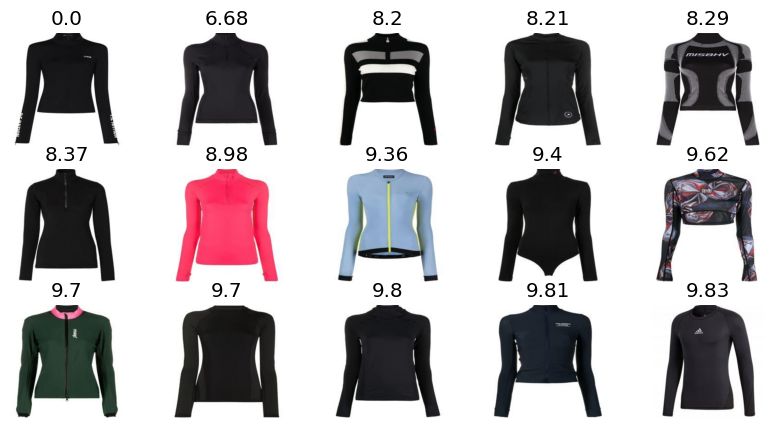

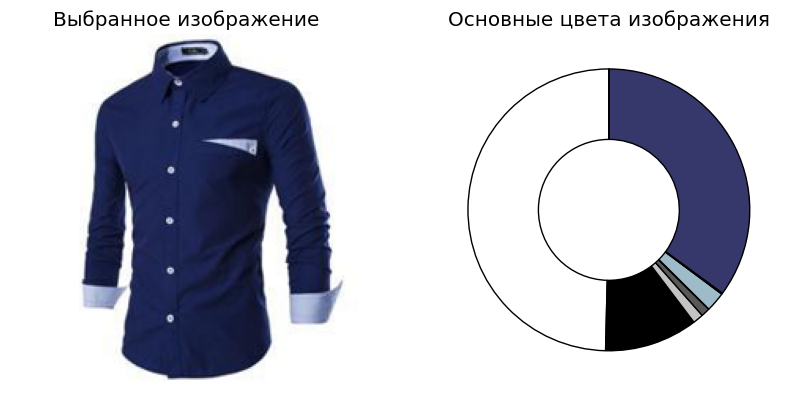

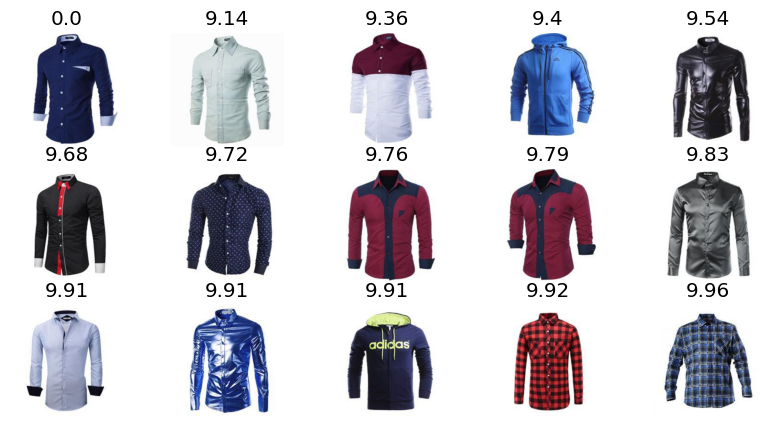

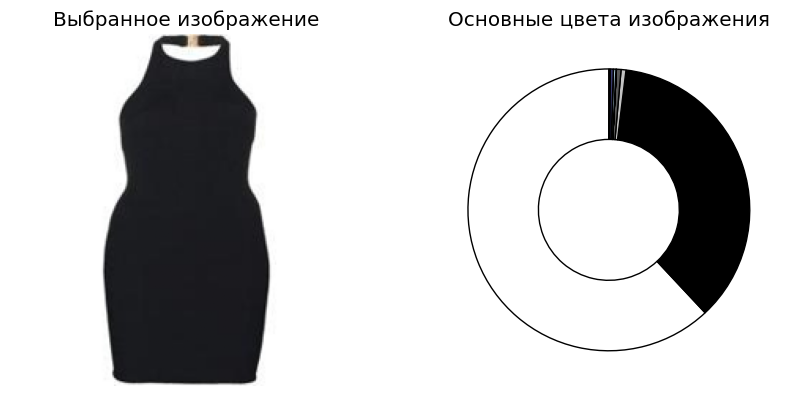

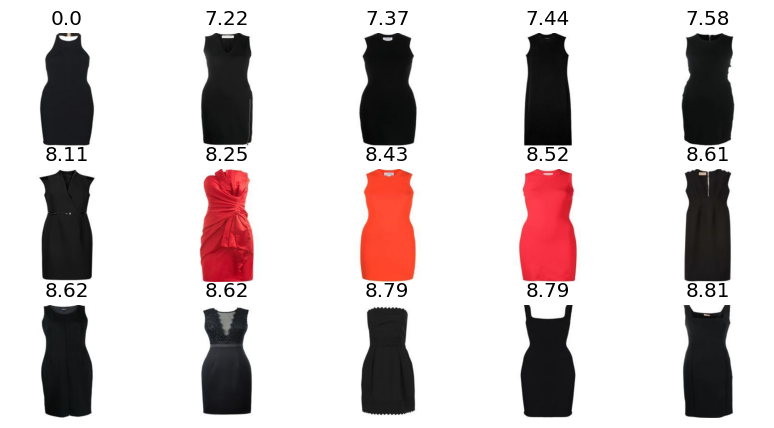

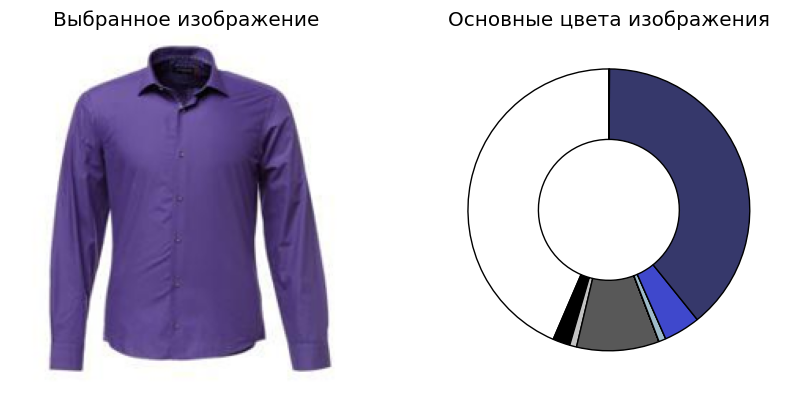

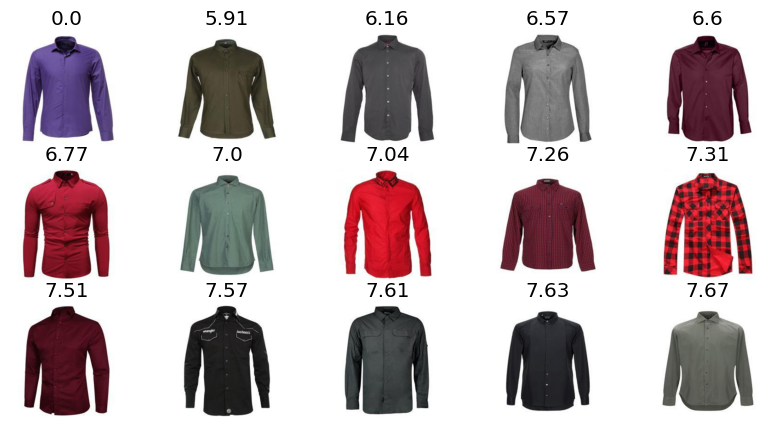

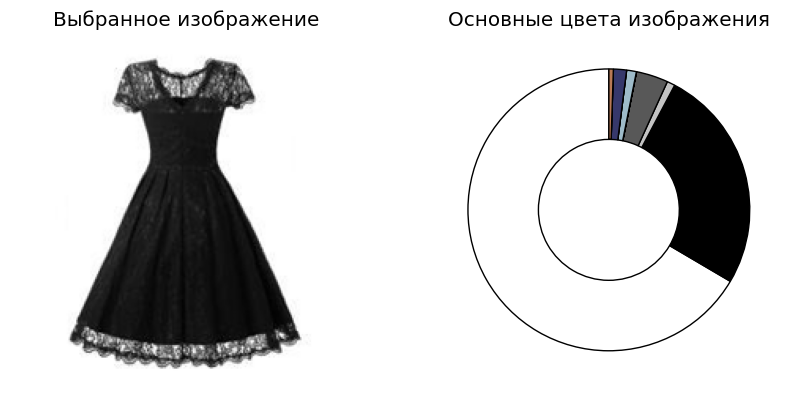

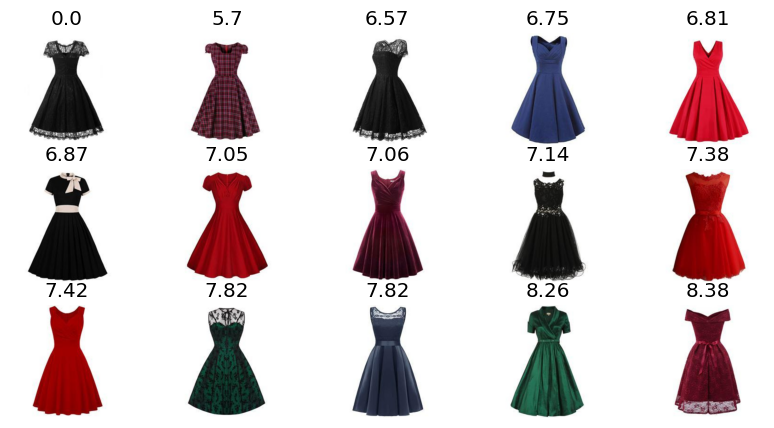

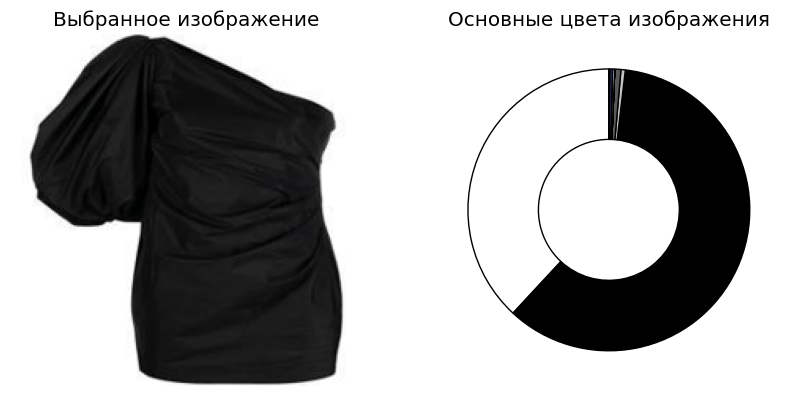

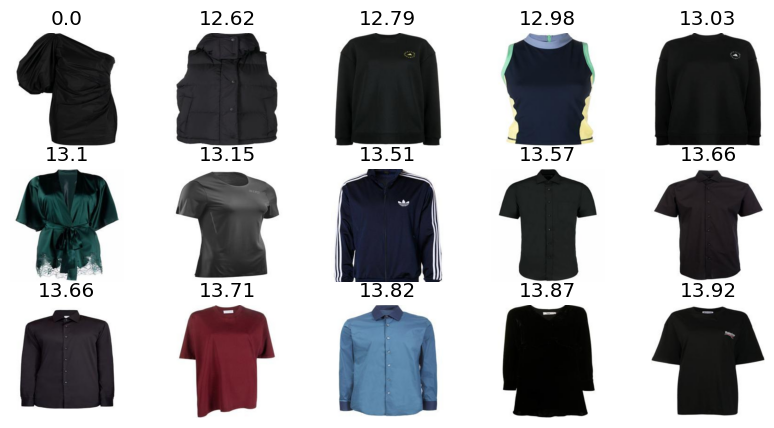

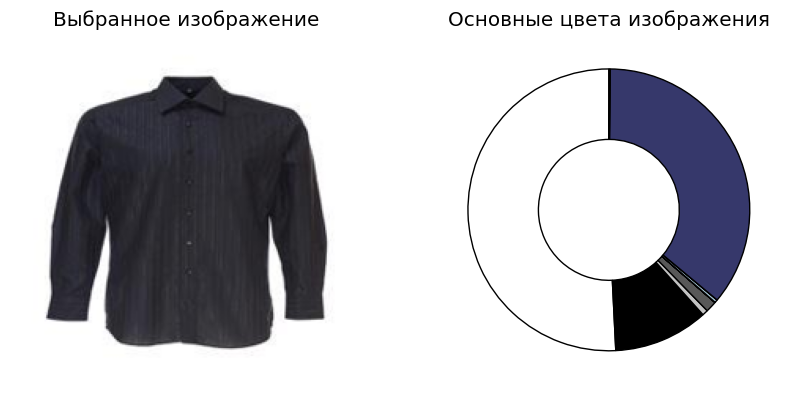

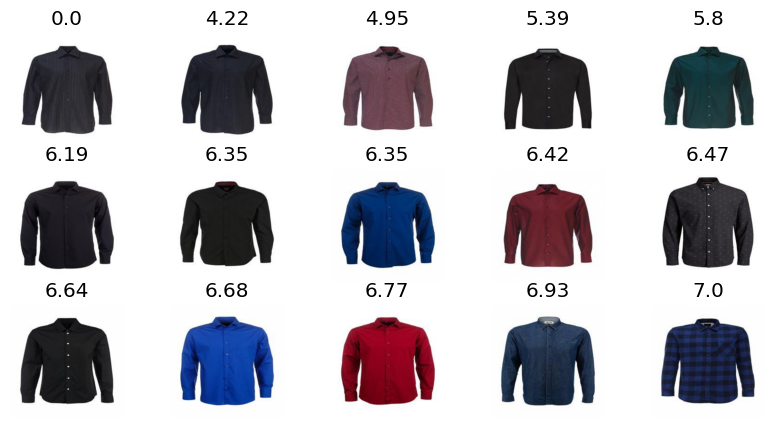

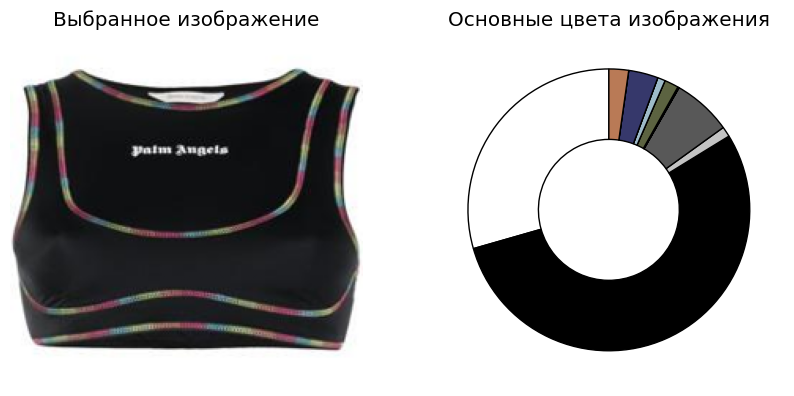

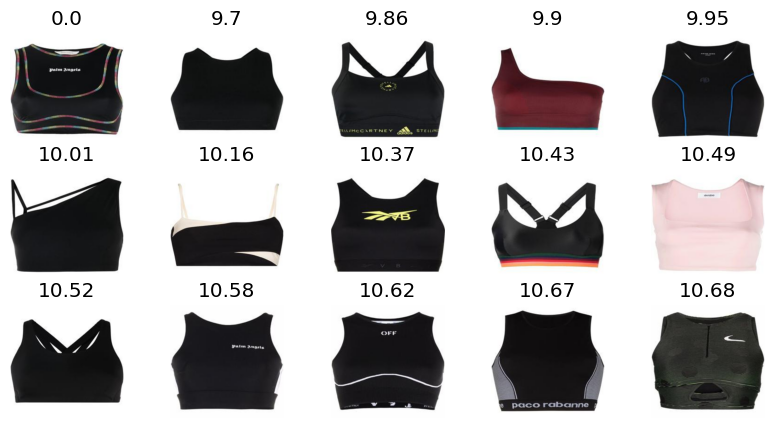

In [ ]:
for i in range(10):                        #Цикл 10 раз
    a = randint(0, len(file_list))         #Генерируем число в диапазоне колличества наших изображений
    a = file_list[a]                       #Достаем путь до нашего изображения
    show_similar(a)                        #Вызываем функцию отображения похожих изображений